In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
from sklearn import linear_model
log = linear_model.LogisticRegression()

<BarContainer object of 14999 artists>

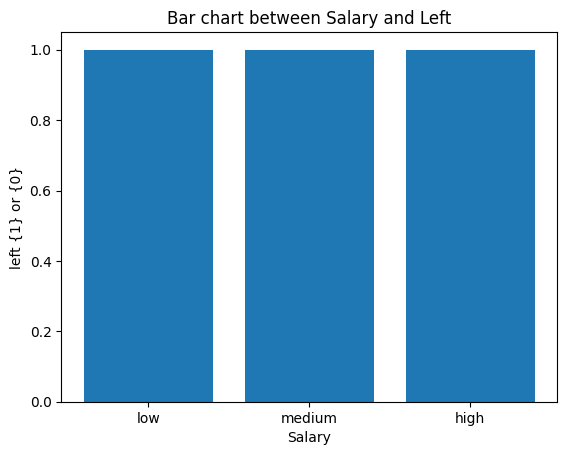

In [15]:
plt.xlabel('Salary')
plt.ylabel('left {1} or {0}')
plt.title('Bar chart between Salary and Left')
plt.bar(df.salary, df.left)

<Axes: xlabel='salary'>

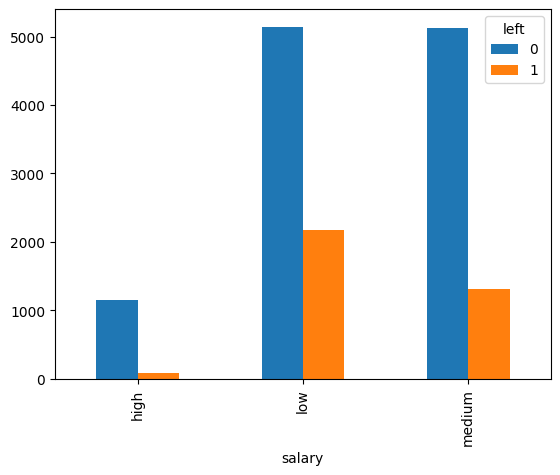

In [16]:
pd.crosstab(df.salary,df.left).plot(kind='bar')


<Axes: xlabel='salary'>

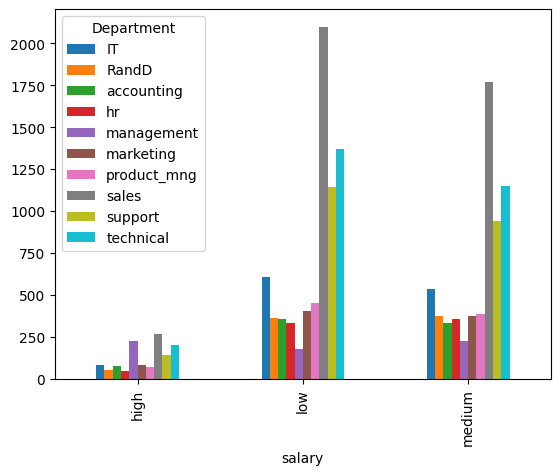

In [20]:
pd.crosstab(df.salary, df.Department).plot(kind='bar')

In [27]:
import math
df.groupby('left').mean(numeric_only=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
df.salary

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [30]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [32]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [41]:
add_dummies = pd.get_dummies(subdf.salary, dtype=int)

In [42]:
df_with_dummies = pd.concat([subdf, add_dummies], axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [50]:
remove_salary = df_with_dummies.drop('salary',axis='columns')
remove_salary

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [51]:
X = remove_salary

In [53]:
Y = df.left

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8)

In [57]:
x_train

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
10132,0.14,115,0,0,0,1
8968,0.69,216,0,0,1,0
5741,0.59,190,0,0,0,1
7900,0.56,243,0,0,0,1
4157,0.90,259,0,0,0,1
...,...,...,...,...,...,...
1560,0.09,286,0,0,1,0
7776,0.83,179,0,0,1,0
3866,0.70,216,0,0,1,0
6031,0.23,156,0,0,1,0


In [58]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
6626,0.40,127,0,0,1,0
3377,0.13,234,0,0,0,1
8565,0.96,273,0,0,1,0
6603,0.46,140,0,1,0,0
11063,0.80,203,0,0,0,1
...,...,...,...,...,...,...
5956,0.74,221,0,0,1,0
6041,0.96,145,0,0,0,1
8070,0.92,161,0,0,0,1
12368,0.82,243,0,0,1,0


In [55]:
log.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [56]:
log.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
log.score(x_test,y_test)

0.7806666666666666

In [62]:
import joblib

In [63]:
joblib.dump(log,'hr_analytics')

['hr_analytics']

In [64]:
my_model = joblib.load('hr_analytics')

In [66]:
my_model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)